In [12]:
## lets try to just graph s levels in blue and p levels in red (what happens if they mix too much with other levels?)

from arc import *
num_points = 250
calc = StarkMap(Caesium())
calc.defineBasis(41, 1.0, 0.5, 0.5,35, 60, 6)
calc.diagonalise(np.linspace(0,20000,num_points),progressOutput=True,upTo = 6, totalContributionMax = .99999999999)
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability())

Finding eigenvectors...
100%

-2.88843 MHz cm^2 / V^2 


In [13]:
print(len(calc.y),len(calc.y[0]), len([i[0] for i in calc.y]))


250 325 250


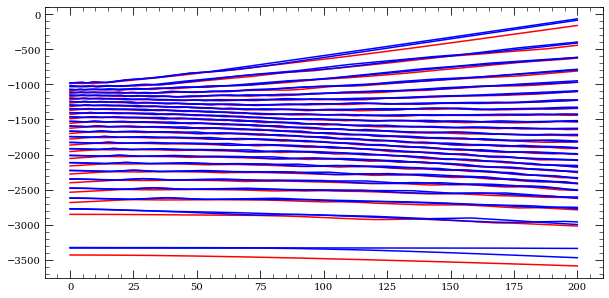

In [14]:
from scipy import constants as sc
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]



# Sweep the electric field and calculate energy levels (in GHz)
electric_fields = calc.eFieldList  # Electric fields applied in V/m
energy_levels = calc.y  # Stark shifted energy levels in GHz
basis = calc.basisStates

for i in range(len(calc.y[0])):
    if basis[i][1] == 0:
        plt.plot(electric_fields/100, [j[i] for j in calc.y], c = 'r')
    if basis[i][1] == 1:
        plt.plot(electric_fields/100, [j[i] for j in calc.y], c = 'b')
    



plt.show()

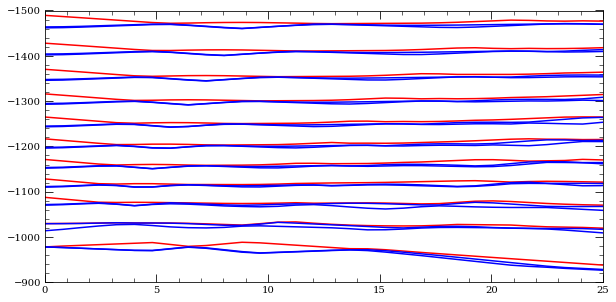

In [15]:
##zoom in and enhance
from scipy import constants as sc
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]



# Sweep the electric field and calculate energy levels (in GHz)
electric_fields = calc.eFieldList  # Electric fields applied in V/m
energy_levels = calc.y  # Stark shifted energy levels in GHz
basis = calc.basisStates

for i in range(len(calc.y[0])):
    if basis[i][1] == 0:
        plt.plot(electric_fields/100, [j[i] for j in calc.y], c = 'r')
    if basis[i][1] == 1:
        plt.plot(electric_fields/100, [j[i] for j in calc.y], c = 'b')


plt.xlim(0,25)
plt.ylim(-900,-1500)
plt.show()

325 250
0.025875917330495213


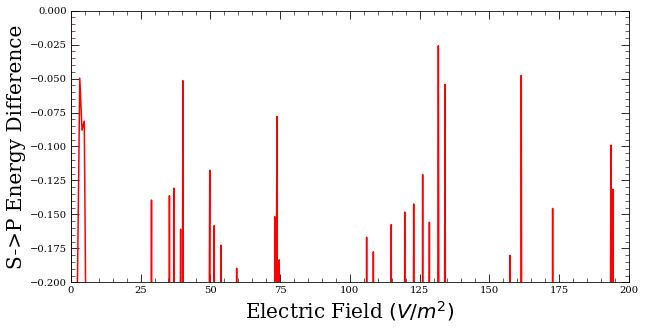

In [16]:
min_vals =[]
b_len = len(calc.y[0])
e_len = len(calc.y)
print(b_len,e_len)
for i in range(len(calc.y[0])):
    if basis[i][1] == 0:
        for k in range(len(calc.y[0])): 
            if basis[k][1] == 1:
                plt.plot(electric_fields/100, [j[i]-j[k] for j in calc.y], c = 'r')
                min_vals.append(min([abs(j[i]-j[k]) for j in calc.y[1:]]))

                
print(min(min_vals))
plt.ylim(-.2,0)
plt.xlim(0,200)


plt.xlabel("Electric Field $(V/m^2)$",fontsize = 20)
plt.ylabel("S->P Energy Difference", fontsize = 20)
plt.show()
##according to this the min closest values for any s->p transition is 31 MHz ---- this doesn't agree with my past code tho?

###interesting note is that I changed the code to extend to 1000 V/m^2 and the min number went up to 61 MHz, (i kept the same number of total points though, so we need to have fairly small e field steps for accuracy)

##doubling the num points brought it down to 17 MHz although did not go down after increasing to 4000 points, so perhaps this is the true value